In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = 'GeneralAviationDashboard_Data_20221208_Public.xlsx'
sheet_name = 'Accidents'

# Read the data from the "Accidents" sheet
try:
    accidents_df = pd.read_excel(file_path, sheet_name=sheet_name)
    read_success = True
except Exception as e:
    read_success = False
    error_message = str(e)
    
None if read_success else print(error_message)

# Filter the dataset for accidents in Alaska with a fatal injury level
# filtered_df = accidents_df[(accidents_df['StateOrRegion'] == 'Alaska') & (accidents_df['InjuryLevel'] == 'Fatal')]
# # filtered_df = accidents_df[(accidents_df['StateOrRegion'] == 'Alaska')]

# print(f"Total accidents in Alaska: {len(filtered_df)}")
# print(f"Total fatal accidents in Alaska: {len(filtered_df)}")
# print(f"Total nonfatal accidents in Alaska: {len(filtered_df)}")
# print(f"Total accidents in Alaska involving serious or fatal injuries: {len(filtered_df)}")

# print(filtered_df.head())  # Displaying the first few rows of the filtered data

C:\Users\zkhan\AppData\Local\Temp\ipykernel_21380\2287650634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_accidents['Month'] = state_accidents['EventDate'].dt.month


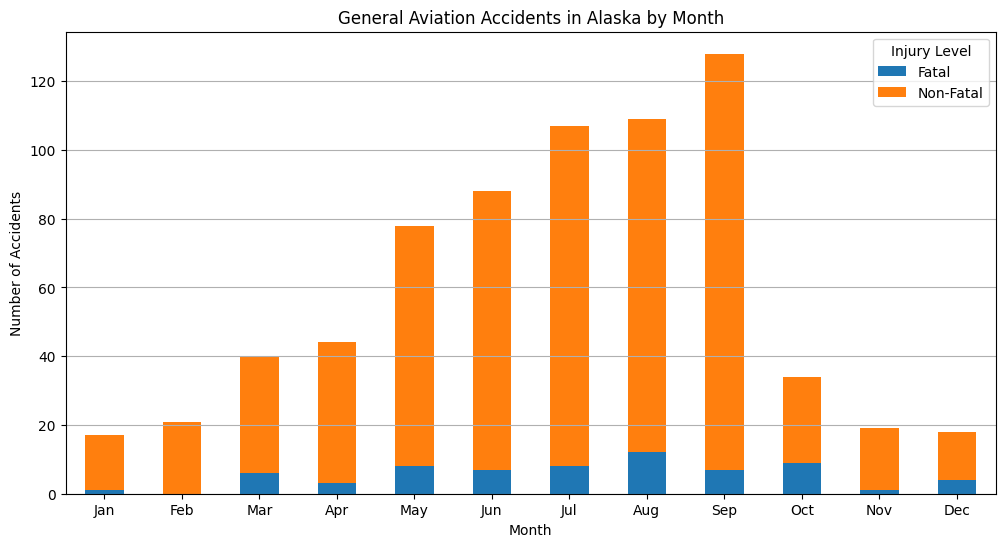

In [2]:
# Filter for accidents in stateName
stateName = 'Alaska'
state_accidents = accidents_df[accidents_df['StateOrRegion'] == stateName]

# Extract the month from the EventDate
state_accidents['Month'] = state_accidents['EventDate'].dt.month

# Group by month and injury level, then count the accidents
monthly_accidents = state_accidents.groupby(['Month', 'InjuryLevel']).size().unstack(fill_value=0)

# Plotting the timeline style bar chart
monthly_accidents.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title(f'General Aviation Accidents in {stateName} by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Injury Level')
plt.grid(axis='y')
plt.show()


C:\Users\zkhan\AppData\Local\Temp\ipykernel_21380\986458781.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continental_us_accidents['Month'] = continental_us_accidents['EventDate'].dt.month


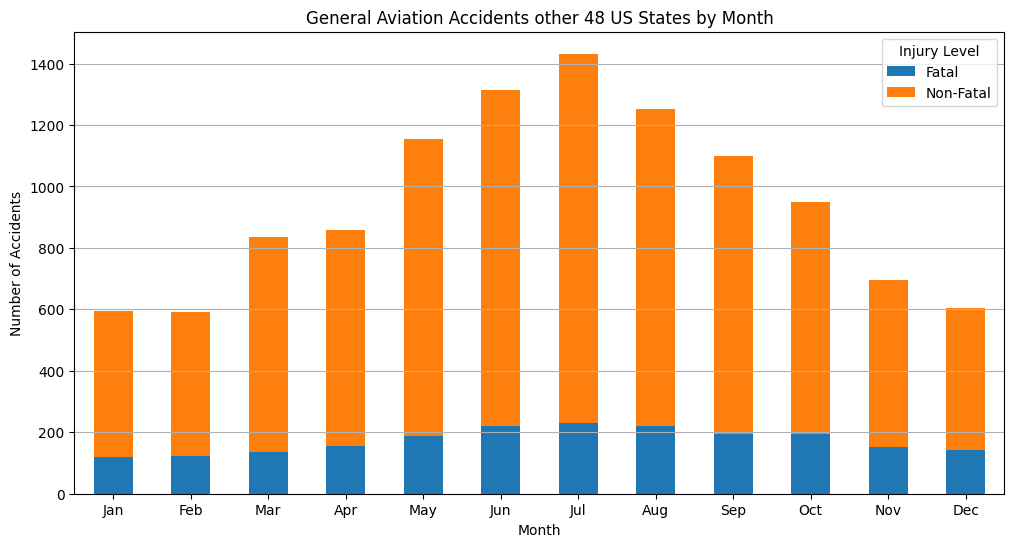

In [3]:
# Filter for accidents in Continental US
continental_us_accidents = accidents_df[
    (accidents_df['Country'] == 'United States') & 
    (accidents_df['StateOrRegion'] != 'Alaska') &
    (accidents_df['StateOrRegion'] != 'Hawaii')
]

# Extract the month from the EventDate
continental_us_accidents['Month'] = continental_us_accidents['EventDate'].dt.month

# Group by month and injury level, then count the accidents
monthly_accidents = continental_us_accidents.groupby(['Month', 'InjuryLevel']).size().unstack(fill_value=0)

# Plotting the timeline style bar chart
monthly_accidents.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('General Aviation Accidents other 48 US States by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Injury Level')
plt.grid(axis='y')
plt.show()



C:\Users\zkhan\AppData\Local\Temp\ipykernel_21380\4203634981.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  september_alaska_accidents['Year'] = september_alaska_accidents['EventDate'].dt.year


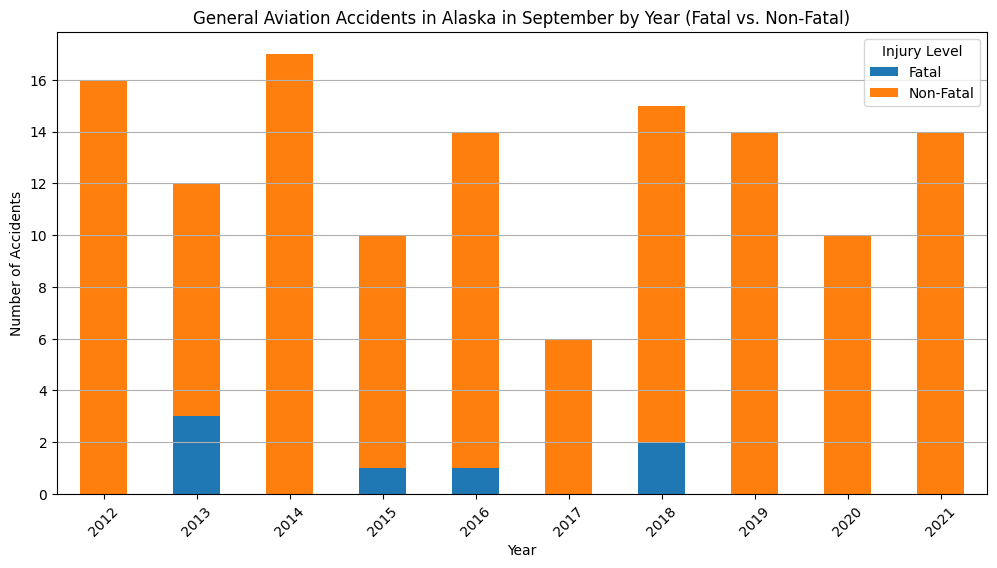

In [4]:
# Filter for accidents in Alaska in September
september_alaska_accidents = accidents_df[
    (accidents_df['StateOrRegion'] == 'Alaska') & 
    (accidents_df['EventDate'].dt.month == 9)
]

# Extract the year from the EventDate
september_alaska_accidents['Year'] = september_alaska_accidents['EventDate'].dt.year

# Group by year and injury level, then count the accidents
accident_counts = september_alaska_accidents.groupby(['Year', 'InjuryLevel']).size().unstack(fill_value=0)

# Plotting the bar chart
accident_counts.plot(kind='bar', figsize=(12, 6), stacked=True)

plt.title('General Aviation Accidents in Alaska in September by Year (Fatal vs. Non-Fatal)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Injury Level')
plt.grid(axis='y')
plt.show()


In [5]:
# Filter for fatal accidents in Alaska
fatal_alaska_accidents = accidents_df[
    (accidents_df['StateOrRegion'] == 'Alaska') & 
    (accidents_df['InjuryLevel'] == 'Fatal')
]

# Extract the report links for Alaska
alaska_report_links = fatal_alaska_accidents['Report'].tolist()

# Now, filter for fatal accidents in the Continental US (excluding Alaska and Hawaii)
fatal_cont_us_accidents = accidents_df[
    (accidents_df['Country'] == 'United States') & 
    (accidents_df['StateOrRegion'] != 'Alaska') & 
    (accidents_df['StateOrRegion'] != 'Hawaii') & 
    (accidents_df['InjuryLevel'] == 'Fatal')
]

# Extract the report links for the Continental US
cont_us_report_links = fatal_cont_us_accidents['Report'].tolist()

# alaska_report_links, cont_us_report_links

# Creating DataFrames for the links
alaska_links_df = pd.DataFrame({'Alaska_Fatal_Accident_Links': alaska_report_links})
cont_us_links_df = pd.DataFrame({'Continental_US_Fatal_Accident_Links': cont_us_report_links})

# Define the file paths for the CSVs
alaska_csv_file_path = 'alaska_fatal_accident_reports_links.csv'  # Change as needed
cont_us_csv_file_path = 'continental_us_fatal_accident_reports_links.csv'  # Change as needed

# Write to separate CSV files
alaska_links_df.to_csv(alaska_csv_file_path, index=False)
cont_us_links_df.to_csv(cont_us_csv_file_path, index=False)

print(f"Alaska report links written to {alaska_csv_file_path}")
print(f"Continental US report links written to {cont_us_csv_file_path}")


Alaska report links written to alaska_fatal_accident_reports_links.csv
Continental US report links written to continental_us_fatal_accident_reports_links.csv


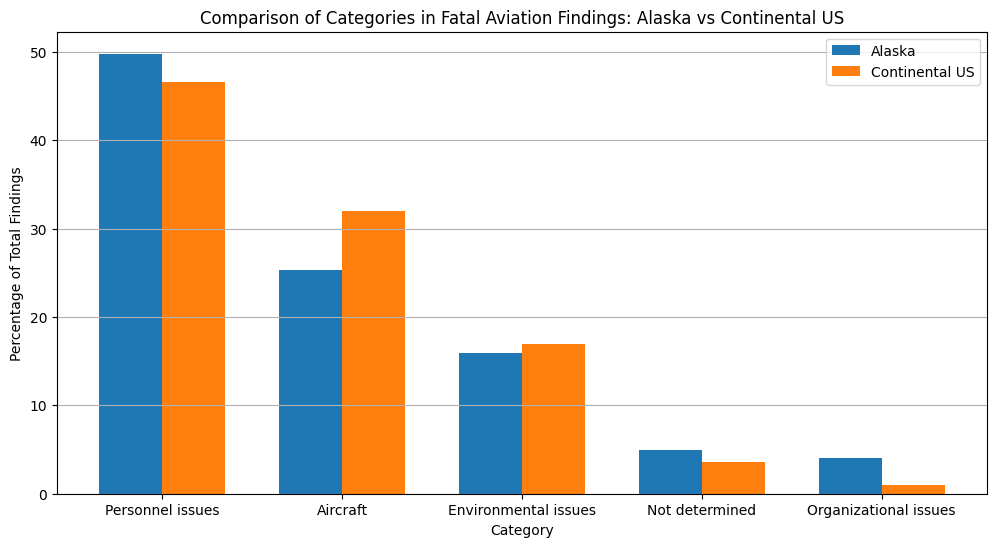

In [6]:
# Load the data from the Accidents and Findings sheets
file_path = 'GeneralAviationDashboard_Data_20221208_Public.xlsx'
accidents_df = pd.read_excel(file_path, sheet_name='Accidents')
findings_df = pd.read_excel(file_path, sheet_name='Findings')

# Filter for fatal accidents in Alaska from the Accidents sheet
fatal_alaska_accidents = accidents_df[
    (accidents_df['StateOrRegion'] == 'Alaska') & 
    (accidents_df['InjuryLevel'] == 'Fatal')
]

# Extract MKeys from the fatal Alaska accidents
alaska_fatal_mkeys = fatal_alaska_accidents['MKey'].tolist()

# Filter the Findings data using the extracted MKeys
alaska_fatal_findings = findings_df[findings_df['MKey'].isin(alaska_fatal_mkeys)]


# Filter for fatal accidents in the Continental US
fatal_cont_us_accidents = accidents_df[
    (accidents_df['Country'] == 'United States') &
    (accidents_df['StateOrRegion'] != 'Alaska') & 
    (accidents_df['StateOrRegion'] != 'Hawaii') & 
    (accidents_df['InjuryLevel'] == 'Fatal')
]

# Extract MKeys from the fatal Continental US accidents
cont_us_fatal_mkeys = fatal_cont_us_accidents['MKey'].tolist()

# Filter the Findings data using the extracted MKeys
cont_us_fatal_findings = findings_df[findings_df['MKey'].isin(cont_us_fatal_mkeys)]


# Total number of fatal accidents in Alaska and the Continental US
total_fatal_accidents_alaska = len(fatal_alaska_accidents)
total_fatal_accidents_cont_us = len(fatal_cont_us_accidents)


# Total number of findings for fatal accidents in Alaska
total_findings_alaska = len(alaska_fatal_findings)

# Count the occurrences of each category and calculate percentages
alaska_category_percentages = (alaska_fatal_findings['Category'].value_counts() / total_findings_alaska) * 100

# Total number of findings for fatal accidents in the Continental US
total_findings_cont_us = len(cont_us_fatal_findings)

# Count the occurrences of each category and calculate percentages
cont_us_category_percentages = (cont_us_fatal_findings['Category'].value_counts() / total_findings_cont_us) * 100

# Convert the Series to DataFrames and reset index
alaska_df = alaska_category_percentages.reset_index()
alaska_df.columns = ['Category', 'Alaska_Percentage']

cont_us_df = cont_us_category_percentages.reset_index()
cont_us_df.columns = ['Category', 'US_Percentage']

# Merge the two DataFrames on Category
combined_df = pd.merge(alaska_df, cont_us_df, on='Category', how='outer')

# Replace NaN values with 0 (for categories that might exist in one region but not in the other)
combined_df.fillna(0, inplace=True)

# Plotting side-by-side bar chart
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35  # width of the bars

# Setting the positions of the bars
ind = np.arange(len(combined_df))
ax.bar(ind - width/2, combined_df['Alaska_Percentage'], width, label='Alaska')
ax.bar(ind + width/2, combined_df['US_Percentage'], width, label='Continental US')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Category')
ax.set_ylabel('Percentage of Total Findings')
ax.set_title('Comparison of Categories in Fatal Aviation Findings: Alaska vs Continental US')
ax.set_xticks(ind)
ax.set_xticklabels(combined_df['Category'], rotation=0)
ax.legend()

plt.grid(axis='y')
plt.show()


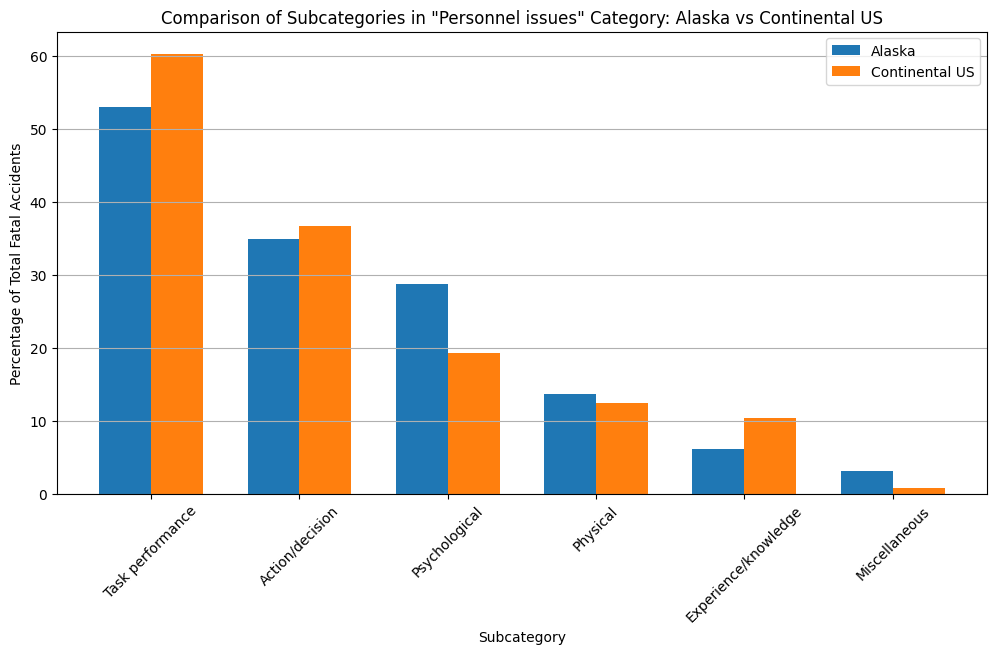

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (assuming the accidents_df and findings_df DataFrames are already loaded)
# Filter for 'Personnel issues' category in Alaska and the Continental US
alaska_personnel_issues = alaska_fatal_findings[alaska_fatal_findings['Category'] == 'Personnel issues']
us_personnel_issues = cont_us_fatal_findings[cont_us_fatal_findings['Category'] == 'Personnel issues']

# Remove duplicates within each MKey for the subcategory in both Alaska and the Continental US
alaska_unique_personnel_subcategories = alaska_personnel_issues.drop_duplicates(subset=['MKey', 'Subcategory'])
us_unique_personnel_subcategories = us_personnel_issues.drop_duplicates(subset=['MKey', 'Subcategory'])

# Calculate the percentages of each subcategory relative to the total fatal accidents
alaska_personnel_subcat_percentages = (alaska_unique_personnel_subcategories['Subcategory'].value_counts() / total_fatal_accidents_alaska) * 100
us_personnel_subcat_percentages = (us_unique_personnel_subcategories['Subcategory'].value_counts() / total_fatal_accidents_cont_us) * 100

# Convert to DataFrames and merge
alaska_personnel_df = alaska_personnel_subcat_percentages.reset_index()
alaska_personnel_df.columns = ['Subcategory', 'Alaska_Percentage']

us_personnel_df = us_personnel_subcat_percentages.reset_index()
us_personnel_df.columns = ['Subcategory', 'US_Percentage']

combined_personnel_df = pd.merge(alaska_personnel_df, us_personnel_df, on='Subcategory', how='outer')
combined_personnel_df.fillna(0, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
ind = np.arange(len(combined_personnel_df))

width = 0.35  # width of the bars
ax.bar(ind - width/2, combined_personnel_df['Alaska_Percentage'], width, label='Alaska')
ax.bar(ind + width/2, combined_personnel_df['US_Percentage'], width, label='Continental US')

ax.set_xlabel('Subcategory')
ax.set_ylabel('Percentage of Total Fatal Accidents')
ax.set_title('Comparison of Subcategories in "Personnel issues" Category: Alaska vs Continental US')
ax.set_xticks(ind)
ax.set_xticklabels(combined_personnel_df['Subcategory'], rotation=45)
ax.legend()

plt.grid(axis='y')
plt.show()

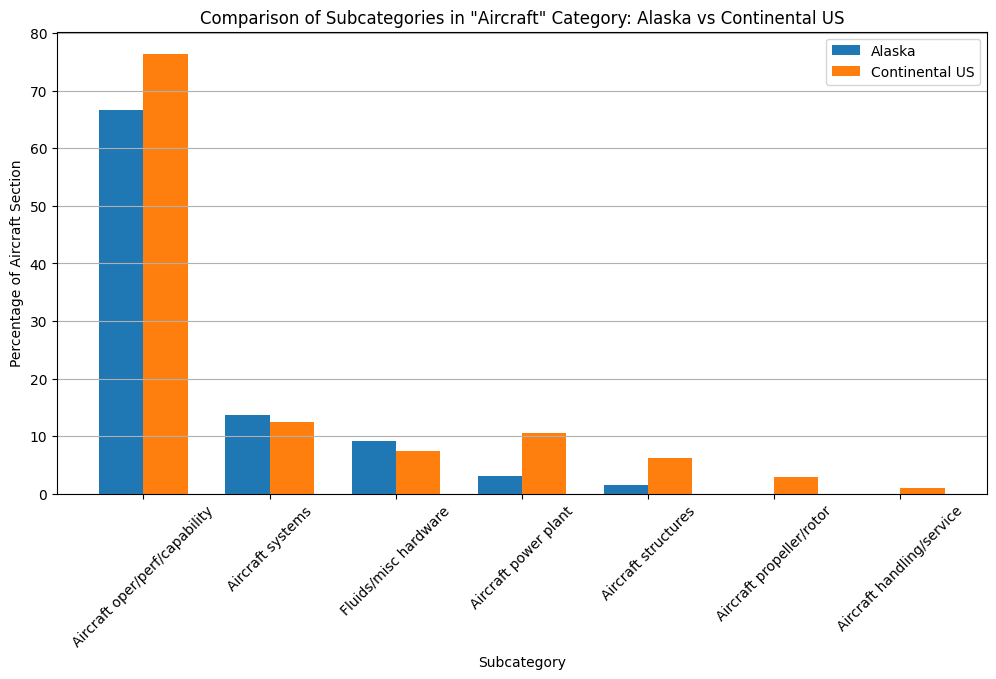

In [8]:
# Filter for 'Aircraft' category in Alaska and the Continental US
alaska_aircraft_issues = alaska_fatal_findings[alaska_fatal_findings['Category'] == 'Aircraft']
us_aircraft_issues = cont_us_fatal_findings[cont_us_fatal_findings['Category'] == 'Aircraft']

# Calculate the percentages of each subcategory
alaska_aircraft_subcat_percentages = (alaska_aircraft_issues['Subcategory'].value_counts() / total_fatal_accidents_alaska) * 100
us_aircraft_subcat_percentages = (us_aircraft_issues['Subcategory'].value_counts() / total_fatal_accidents_cont_us) * 100

# Convert to DataFrames and merge
alaska_aircraft_df = alaska_aircraft_subcat_percentages.reset_index()
alaska_aircraft_df.columns = ['Subcategory', 'Alaska_Percentage']

us_aircraft_df = us_aircraft_subcat_percentages.reset_index()
us_aircraft_df.columns = ['Subcategory', 'US_Percentage']

combined_aircraft_df = pd.merge(alaska_aircraft_df, us_aircraft_df, on='Subcategory', how='outer')
combined_aircraft_df.fillna(0, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
ind = np.arange(len(combined_aircraft_df))

ax.bar(ind - width/2, combined_aircraft_df['Alaska_Percentage'], width, label='Alaska')
ax.bar(ind + width/2, combined_aircraft_df['US_Percentage'], width, label='Continental US')

ax.set_xlabel('Subcategory')
ax.set_ylabel('Percentage of Aircraft Section')
ax.set_title('Comparison of Subcategories in "Aircraft" Category: Alaska vs Continental US')
ax.set_xticks(ind)
ax.set_xticklabels(combined_aircraft_df['Subcategory'], rotation=45)
ax.legend()

plt.grid(axis='y')
plt.show()

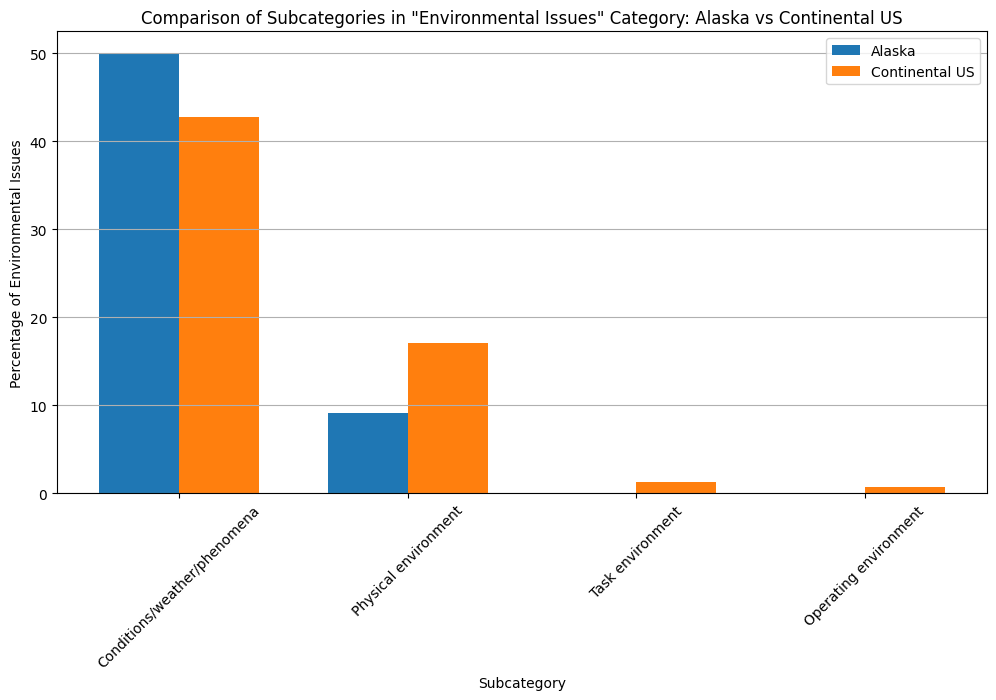

In [9]:
# Filter for 'Environmental Issues' category in Alaska and the Continental US
alaska_environmental_issues = alaska_fatal_findings[alaska_fatal_findings['Category'] == 'Environmental issues']
us_environmental_issues = cont_us_fatal_findings[cont_us_fatal_findings['Category'] == 'Environmental issues']

# Calculate the percentages of each subcategory
alaska_environmental_subcat_percentages = (alaska_environmental_issues['Subcategory'].value_counts() / total_fatal_accidents_alaska) * 100
us_environmental_subcat_percentages = (us_environmental_issues['Subcategory'].value_counts() / total_fatal_accidents_cont_us) * 100

# Convert to DataFrames and merge
alaska_environmental_df = alaska_environmental_subcat_percentages.reset_index()
alaska_environmental_df.columns = ['Subcategory', 'Alaska_Percentage']

us_environmental_df = us_environmental_subcat_percentages.reset_index()
us_environmental_df.columns = ['Subcategory', 'US_Percentage']

combined_environmental_df = pd.merge(alaska_environmental_df, us_environmental_df, on='Subcategory', how='outer')
combined_environmental_df.fillna(0, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
ind = np.arange(len(combined_environmental_df))

ax.bar(ind - width/2, combined_environmental_df['Alaska_Percentage'], width, label='Alaska')
ax.bar(ind + width/2, combined_environmental_df['US_Percentage'], width, label='Continental US')

ax.set_xlabel('Subcategory')
ax.set_ylabel('Percentage of Environmental Issues')
ax.set_title('Comparison of Subcategories in "Environmental Issues" Category: Alaska vs Continental US')
ax.set_xticks(ind)
ax.set_xticklabels(combined_environmental_df['Subcategory'], rotation=45)
ax.legend()

plt.grid(axis='y')
plt.show()

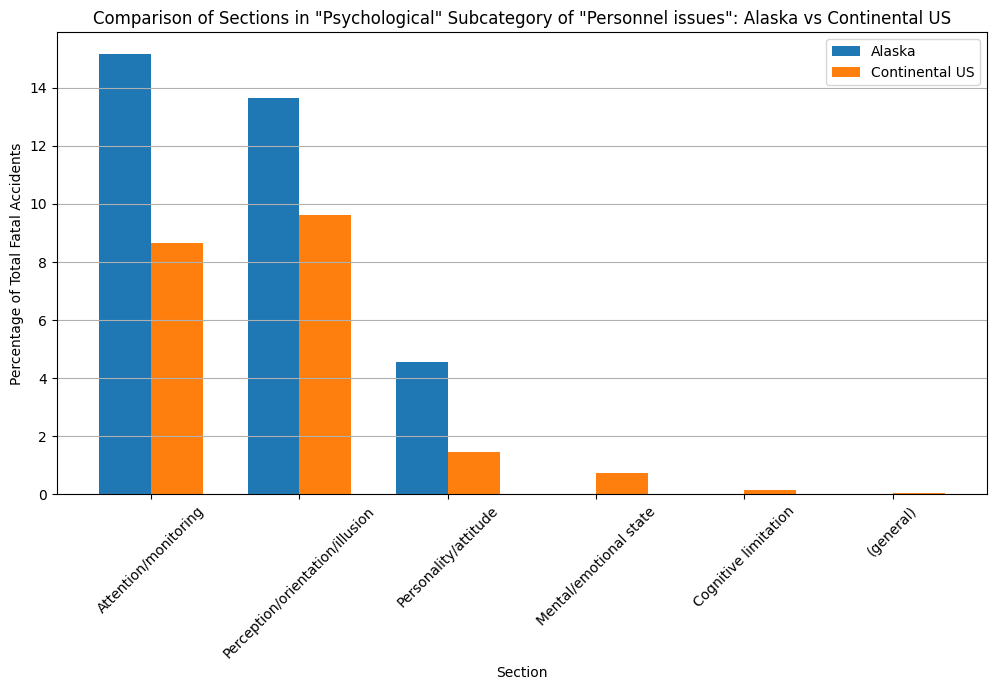

In [10]:
# Total number of fatal accidents in Alaska and the Continental US
total_fatal_accidents_alaska = len(fatal_alaska_accidents)
total_fatal_accidents_cont_us = len(fatal_cont_us_accidents)

# Filter for 'Personnel issues' -> 'Psychological' in Alaska and the Continental US
alaska_psychological_issues = alaska_fatal_findings[(alaska_fatal_findings['Category'] == 'Personnel issues') & (alaska_fatal_findings['Subcategory'] == 'Psychological')]
us_psychological_issues = cont_us_fatal_findings[(cont_us_fatal_findings['Category'] == 'Personnel issues') & (cont_us_fatal_findings['Subcategory'] == 'Psychological')]

# Remove duplicates within each MKey for the section
alaska_psychological_issues_unique = alaska_psychological_issues.drop_duplicates(subset=['MKey', 'Section'])
us_psychological_issues_unique = us_psychological_issues.drop_duplicates(subset=['MKey', 'Section'])

# Calculate the percentages of each section relative to the total fatal accidents
alaska_psychological_section_percentages = (alaska_psychological_issues_unique['Section'].value_counts() / total_fatal_accidents_alaska) * 100
us_psychological_section_percentages = (us_psychological_issues_unique['Section'].value_counts() / total_fatal_accidents_cont_us) * 100

# Convert to DataFrames and merge
alaska_psychological_df = alaska_psychological_section_percentages.reset_index()
alaska_psychological_df.columns = ['Section', 'Alaska_Percentage']

us_psychological_df = us_psychological_section_percentages.reset_index()
us_psychological_df.columns = ['Section', 'US_Percentage']

combined_psychological_df = pd.merge(alaska_psychological_df, us_psychological_df, on='Section', how='outer')
combined_psychological_df.fillna(0, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
ind = np.arange(len(combined_psychological_df))

ax.bar(ind - width/2, combined_psychological_df['Alaska_Percentage'], width, label='Alaska')
ax.bar(ind + width/2, combined_psychological_df['US_Percentage'], width, label='Continental US')

ax.set_xlabel('Section')
ax.set_ylabel('Percentage of Total Fatal Accidents')
ax.set_title('Comparison of Sections in "Psychological" Subcategory of "Personnel issues": Alaska vs Continental US')
ax.set_xticks(ind)
ax.set_xticklabels(combined_psychological_df['Section'], rotation=45)
ax.legend()

plt.grid(axis='y')
plt.show()